In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "./Student Depression Dataset.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.shape

(27901, 18)

In [5]:
target_column = 'Depression'

print("Sınıf Dağılımı:")
print(df[target_column].value_counts())

Sınıf Dağılımı:
Depression
1    16336
0    11565
Name: count, dtype: int64


In [6]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [7]:
df['Financial Stress'].fillna(df['Financial Stress'].mode()[0], inplace=True)

C:\Users\Arif\AppData\Local\Temp\ipykernel_20696\4236355950.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].mode()[0], inplace=True)


In [8]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [10]:
yes_no_columns = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for col in yes_no_columns:
    df[col] = df[col].map({'No': 0, 'Yes': 1})

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [11]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


id: [     2      8     26 ... 140689 140690 140699]
Gender: [0 1]
Age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Profession: ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Academic Pressure: [5. 2. 3. 4. 1. 0.]
Work Pressure: [0. 5. 2.]


In [12]:
degree_group_map = {  
    'B.Pharm': 'Undergraduate',  
    'BSc': 'Undergraduate',  
    'BA': 'Undergraduate',  
    'BCA': 'Undergraduate',  
    'B.Ed': 'Undergraduate',  
    'LLB': 'Undergraduate',  
    'BE': 'Undergraduate',  
    'BHM': 'Undergraduate',  
    'B.Com': 'Undergraduate',  
    'B.Arch': 'Undergraduate',  
    'B.Tech': 'Undergraduate',  
    'BBA': 'Undergraduate',  
    'M.Tech': 'Postgraduate',  
    'M.Ed': 'Postgraduate',  
    'MSc': 'Postgraduate',  
    'M.Pharm': 'Postgraduate',  
    'MCA': 'Postgraduate',  
    'MA': 'Postgraduate',  
    'MBA': 'Postgraduate',  
    'M.Com': 'Postgraduate',  
    'ME': 'Postgraduate',  
    'MHM': 'Postgraduate',  
    'LLM': 'Postgraduate',  
    'PhD': 'Doctorate',  
    'MD': 'Doctorate',  
    'MBBS': 'Medical',  
    'Class 12': 'High School',  
    'Others': 'Others'  
}  

# Map the degrees to their groups  
df['Degree_Group'] = df['Degree'].map(degree_group_map)  
df = df.drop('Degree', axis=1)

df['Degree_Group'] = df['Degree_Group'].map({'Others': 0, 'High School': 1, 'Undergraduate': 2, 'Postgraduate':3, 'Medical':4, 'Doctorate':5})

df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Degree_Group
0,2,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,1,3.0,1.0,0,1,2
1,8,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,0,3.0,2.0,1,0,2
2,26,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,0,9.0,1.0,1,0,2
3,30,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,1,4.0,5.0,1,1,2
4,32,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,1,1.0,1.0,0,0,3


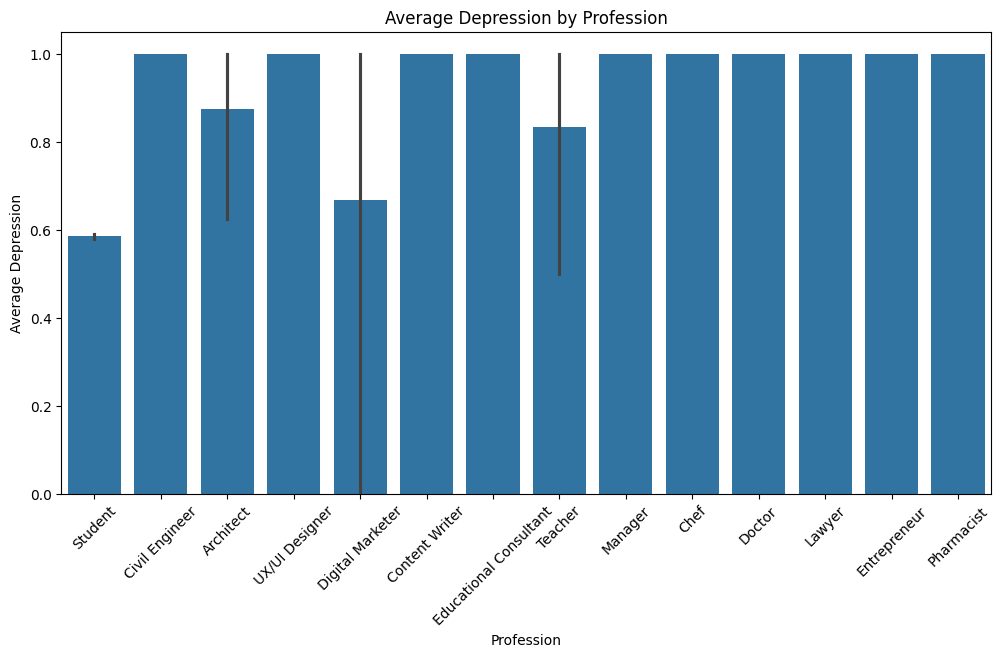

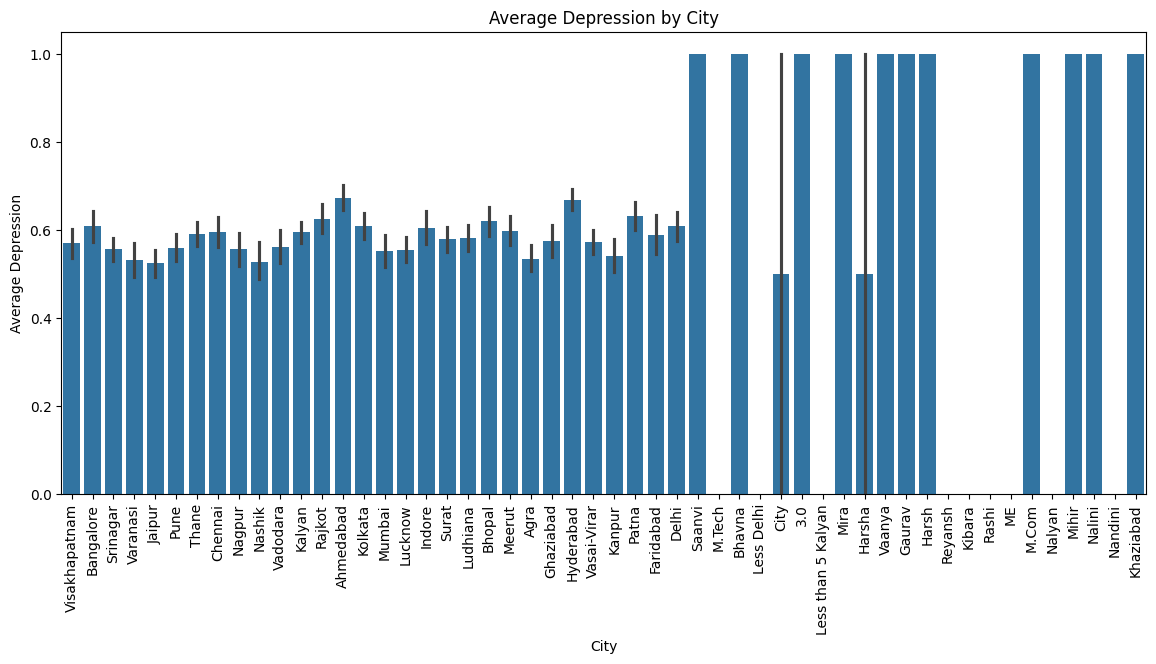

In [13]:
# Profession vs Depression
plt.figure(figsize=(12, 6))
sns.barplot(x='Profession', y='Depression', data=df)
plt.title('Average Depression by Profession')
plt.ylabel('Average Depression')
plt.xlabel('Profession')
plt.xticks(rotation=45)
plt.show()

# City vs Depression
plt.figure(figsize=(14, 6))
sns.barplot(x='City', y='Depression', data=df)
plt.title('Average Depression by City')
plt.ylabel('Average Depression')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()

In [14]:
df = df.drop(['City', 'Profession', 'Work Pressure', 'Job Satisfaction'], axis=1)

In [15]:
df.head()

,id,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Degree_Group
0,2,0,33.0,5.0,8.97,2.0,5-6 hours,Healthy,1,3.0,1.0,0,1,2
1,8,1,24.0,2.0,5.90,5.0,5-6 hours,Moderate,0,3.0,2.0,1,0,2
2,26,0,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,0,9.0,1.0,1,0,2
3,30,1,28.0,3.0,5.59,2.0,7-8 hours,Moderate,1,4.0,5.0,1,1,2
4,32,1,25.0,4.0,8.13,3.0,5-6 hours,Moderate,1,1.0,1.0,0,0,3


In [16]:
#Sleep Duration: ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
df['Sleep Duration'] = df['Sleep Duration'].map({'Others': -1, 'Less than 5 hours':0, '5-6 hours': 1, '7-8 hours':2, 'More than 8 hours':3})

In [17]:
df['Dietary Habits'] = df['Dietary Habits'].map({'Others': -1, 'Unhealthy':0, 'Moderate':1, 'Healthy':2})


In [18]:
df.dtypes

id                                         int64
Gender                                     int64
Age                                      float64
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                             int64
Dietary Habits                             int64
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int64
Depression                                 int64
Degree_Group                               int64
dtype: object

In [19]:
df.head()

,id,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Degree_Group
0,2,0,33.0,5.0,8.97,2.0,1,2,1,3.0,1.0,0,1,2
1,8,1,24.0,2.0,5.90,5.0,1,1,0,3.0,2.0,1,0,2
2,26,0,31.0,3.0,7.03,5.0,0,2,0,9.0,1.0,1,0,2
3,30,1,28.0,3.0,5.59,2.0,2,1,1,4.0,5.0,1,1,2
4,32,1,25.0,4.0,8.13,3.0,1,1,1,1.0,1.0,0,0,3


In [20]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Degree_Group                             0
dtype: int64

In [21]:
print(df['Study Satisfaction'].value_counts())
print(df['Academic Pressure'].value_counts())

Study Satisfaction
4.0    6359
2.0    5838
3.0    5821
1.0    5451
5.0    4422
0.0      10
Name: count, dtype: int64
Academic Pressure
3.0    7462
5.0    6296
4.0    5155
1.0    4801
2.0    4178
0.0       9
Name: count, dtype: int64


In [22]:
for col in ['Study Satisfaction', 'Academic Pressure']:
    mode_val = df.loc[df[col] != 0, col].mode()[0]
    df.loc[df[col] == 0, col] = mode_val

In [23]:
print(df['Study Satisfaction'].value_counts())
print(df['Academic Pressure'].value_counts())

Study Satisfaction
4.0    6369
2.0    5838
3.0    5821
1.0    5451
5.0    4422
Name: count, dtype: int64
Academic Pressure
3.0    7471
5.0    6296
4.0    5155
1.0    4801
2.0    4178
Name: count, dtype: int64


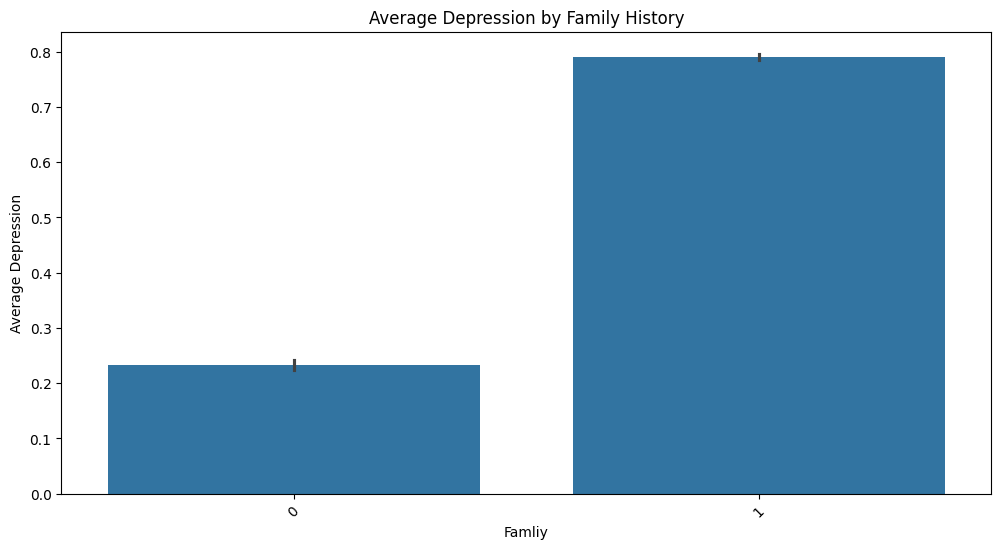

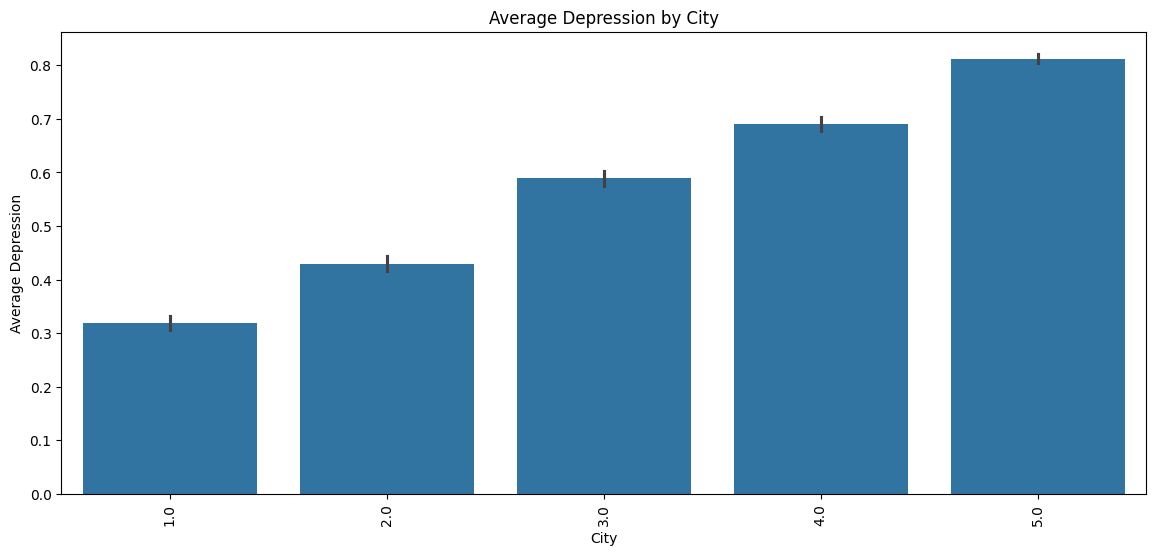

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Have you ever had suicidal thoughts ?', y='Depression', data=df)
plt.title('Average Depression by Family History')
plt.ylabel('Average Depression')
plt.xlabel('Famliy')
plt.xticks(rotation=45)
plt.show()

# City vs Depression
plt.figure(figsize=(14, 6))
sns.barplot(x='Financial Stress', y='Depression', data=df)
plt.title('Average Depression by City')
plt.ylabel('Average Depression')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()

In [25]:
df['Stress_Suicide_Score'] = df['Financial Stress'] + df['Have you ever had suicidal thoughts ?']

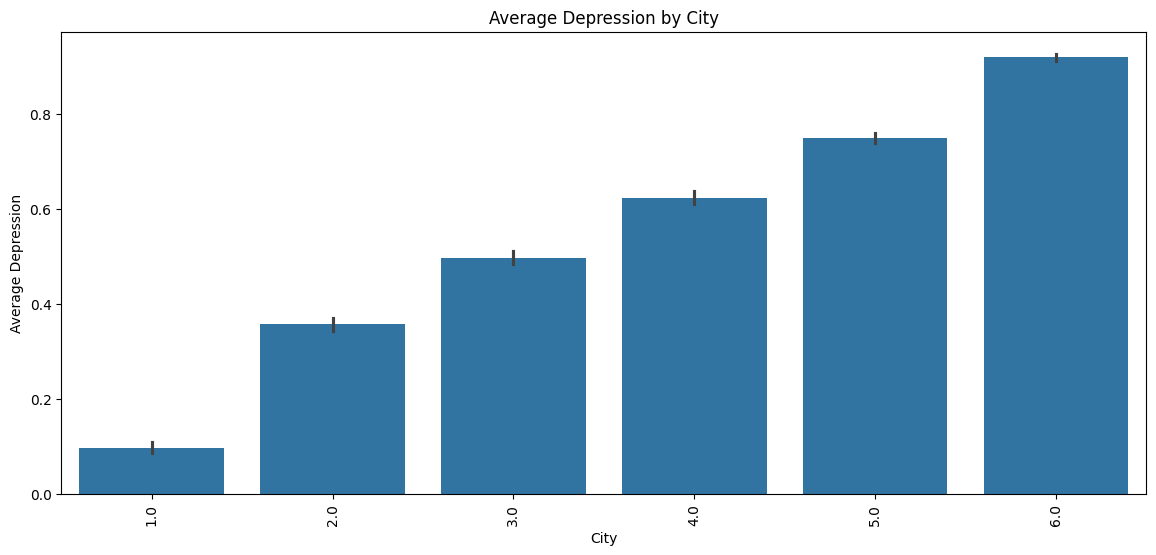

In [26]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Stress_Suicide_Score', y='Depression', data=df)
plt.title('Average Depression by City')
plt.ylabel('Average Depression')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()

In [27]:
df = df.drop(['Financial Stress', 'Have you ever had suicidal thoughts ?'], axis=1)

In [28]:
df.describe()

,id,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Family History of Mental Illness,Depression,Degree_Group,Stress_Suicide_Score
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,0.442780,25.822300,3.142181,7.656104,2.945271,1.397405,0.903588,7.156984,0.483961,0.585499,2.210781,3.772876
std,40641.175216,0.496724,4.905687,1.380314,1.470707,1.360153,1.127969,0.797771,3.707642,0.499752,0.492645,0.945986,1.608732
min,2.000000,0.000000,18.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35039.000000,0.000000,21.000000,2.000000,6.290000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,2.000000
50%,70684.000000,0.000000,25.000000,3.000000,7.770000,3.000000,1.000000,1.000000,8.000000,0.000000,1.000000,2.000000,4.000000
75%,105818.000000,1.000000,30.000000,4.000000,8.920000,4.000000,2.000000,2.000000,10.000000,1.000000,1.000000,3.000000,5.000000
max,140699.000000,1.000000,59.000000,5.000000,10.000000,5.000000,3.000000,2.000000,12.000000,1.000000,1.000000,5.000000,6.000000


In [29]:
# ...existing code...

bins = [17, 22, 27, 32, 37, 45, 60]  # Yaş aralıkları (örnek)
labels = [0, 1, 2, 3, 4, 5]         # Her aralığa bir etiket

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# ...existing code...

In [30]:
df = df.drop(['Age'], axis=1)

In [31]:
bins = [0, 6, 7, 8, 9, 10]
labels = ['F', 'D', 'C', 'B', 'A']
df['CGPA_Group'] = pd.cut(df['CGPA'], bins=bins, labels=labels, include_lowest=True)

In [32]:
df['CGPA_Group'] = (df['CGPA'] * 2).round() / 2

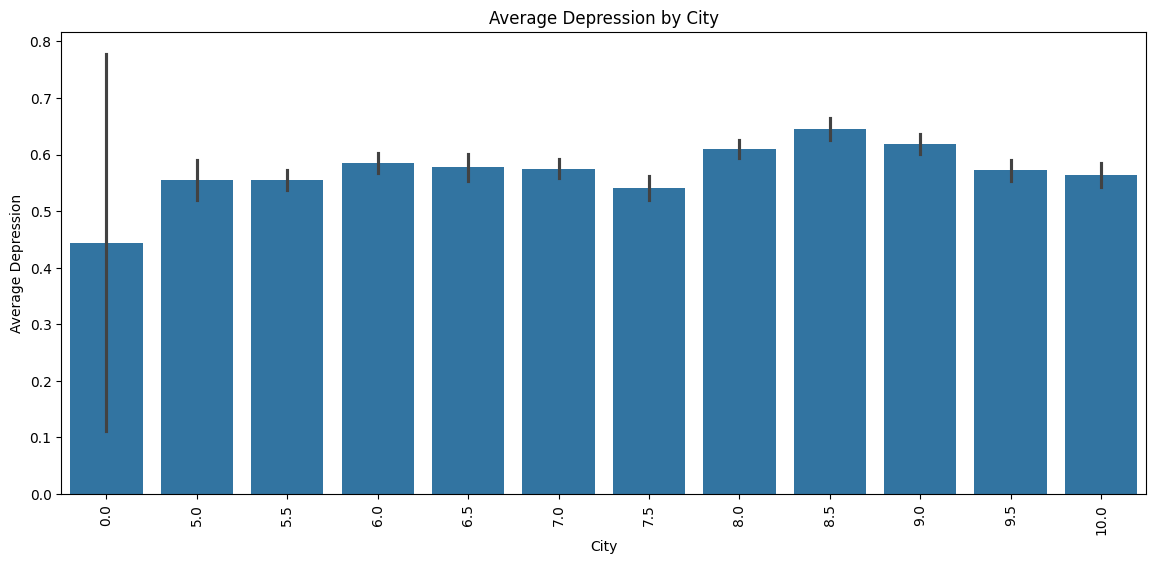

In [33]:
plt.figure(figsize=(14, 6))
sns.barplot(x='CGPA_Group', y='Depression', data=df)
plt.title('Average Depression by City')
plt.ylabel('Average Depression')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()

In [34]:
print(df['CGPA_Group'].value_counts())

CGPA_Group
8.0     3609
7.0     3371
6.0     3023
9.0     2958
5.5     2950
9.5     2734
8.5     2662
10.0    2192
7.5     2031
6.5     1572
5.0      790
0.0        9
Name: count, dtype: int64
